In [19]:
# Chapter 3

### Our first TensorFlow graph

In [20]:
import tensorflow as tf 
a = tf.constant(5) 
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a,b) 
e = tf.add(c,b) 
f = tf.subtract(d,e) 
sess = tf.Session() 
outs_f = sess.run(f) 
outs_e = sess.run(e) 
outs_d = sess.run(d) 
sess.close() 
print("outs_f = {}, outs_e = {}, outs_d = {}".format(outs_f, outs_e, outs_d))
print("outs_e = {}".format(outs_e))
print("outs_d = {}".format(outs_d))

outs_f = 5, outs_e = 5, outs_d = 10
outs_e = 5
outs_d = 10


### Constructing and managing our graph 

In [21]:
import tensorflow as tf
print(tf.get_default_graph())

g = tf.Graph()
print(g)

In [22]:
a = tf.constant(5) 

print(a.graph is g)
print(a.graph is tf.get_default_graph())
print(a)

import numpy as  np
print(str(np.array(a)))

False
True
Tensor("Const_15:0", shape=(), dtype=int32)
Tensor("Const_15:0", shape=(), dtype=int32)


In [23]:
g1 = tf.get_default_graph() 
g2 = tf.Graph() 

print(g1 is tf.get_default_graph())

with g2.as_default(): 
    print(g1 is tf.get_default_graph())

print(g1 is tf.get_default_graph())

True
False
True


### Fetches 

In [24]:
with tf.Session() as sess:
   fetches = [a,b,c,d,e,f]
   outs = sess.run(fetches) 

print("outs = {}".format(outs))
print(type(outs[0]))

outs = [5, 2, 3, 10, 5, 5]
<class 'numpy.int32'>


### Nodes are operations, edges are Tensor objects  

In [25]:
c = tf.constant(4.0)
print(c)

Tensor("Const_16:0", shape=(), dtype=float32)


### Data types  

In [26]:
c = tf.constant(4.0, dtype=tf.float64)
print(c)
print(c.dtype)

Tensor("Const_17:0", shape=(), dtype=float64)
<dtype: 'float64'>


In [27]:
x = tf.constant([1,2,3],name='x',dtype=tf.float32) 
print(x)
print(str(x))
print(x.dtype)
print(x.shape)
print(type(x))
x = tf.cast(x,tf.int64)
print(x.dtype)
sess = tf.InteractiveSession() #RM: Defect. Statement was missing
print(sess.run(x)) #RM: Defect: The statement was sess(x)
sess.close()

Tensor("x_2:0", shape=(3,), dtype=float32)
Tensor("x_2:0", shape=(3,), dtype=float32)
<dtype: 'float32'>
(3,)
<class 'tensorflow.python.framework.ops.Tensor'>
<dtype: 'int64'>
[1 2 3]


### Tensor arrays and Shapes  

In [28]:
import numpy as np 

c = tf.constant([[1,2,3],
                 [4,5,6]]) 
print("Python List input: {}".format(c.get_shape()))

c = tf.constant(np.array([
                 [[1,2,3], 
                  [4,5,6]], 

                 [[1,1,1], 
                  [2,2,2]]
                 ])) 

print("3d Numpy array input: {}".format(c.get_shape()))

Python List input: (2, 3)
3d Numpy array input: (2, 2, 3)


(1, 50000)


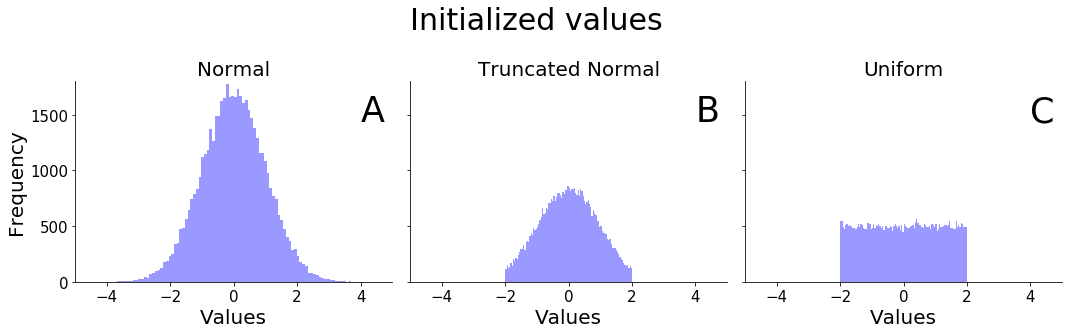

In [29]:
import matplotlib.pyplot as plt 
% matplotlib inline

sess = tf.InteractiveSession()

# === Noramal and Truncated normal distributions ===
mean = 0
std = 1
x_normal = tf.random_normal((1,50000),mean,std).eval()
x_truncated = tf.truncated_normal((1,50000),mean,std).eval()

# === Uniform distribution
minval = -2 
maxval = 2
x_uniform = tf.random_uniform((1,50000),minval,maxval).eval()

sess.close()


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
#     ax.set_ylim([-1.1,1.1])
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,3,figsize=[15,4],sharey=True)
titles = ['Normal','Truncated Normal','Uniform']

print(x_normal.shape)
for i,x in enumerate([x_normal,x_truncated,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0],bins=100,color='b',alpha=0.4)
    ax.set_title(titles[i],fontsize=20)
    ax.set_xlabel('Values',fontsize=20)
    ax.set_xlim([-5,5])
    ax.set_ylim([0,1800])
    
    simpleaxis(ax)
    
    
axarr[0].set_ylabel('Frequency',fontsize=20)
plt.suptitle('Initialized values',fontsize=30, y=1.15)


for ax,letter in zip(axarr,['A','B','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)

plt.tight_layout()

plt.savefig('histograms.png', bbox_inches='tight', format='png', dpi=200, pad_inches=0,transparent=True)

plt.show()

In [30]:
sess = tf.InteractiveSession()
c = tf.linspace(0.0, 4.0, 5) 
print("The content of 'c':\n {}\n".format(c.eval()))
sess.close()

The content of 'c':
 [0. 1. 2. 3. 4.]



### Matrix multiplication

In [31]:
A = tf.constant([ [1,2,3],
                  [4,5,6] ])
print(a.get_shape())

x = tf.constant([1,0,1])
print(x.get_shape())

x = tf.expand_dims(x,1)
print(x.get_shape())

b = tf.matmul(A,x)

sess = tf.InteractiveSession()
print('matmul result:\n {}'.format(b.eval()))
sess.close()

()
(3,)
(3, 1)
matmul result:
 [[ 4]
 [10]]


### Names  

In [32]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    c2 = tf.constant(4,dtype=tf.int32,name='c') 
print(c1.name)
print(c2.name)

c:0
c_1:0


### Name scopes

In [33]:
with tf.Graph().as_default():
    c1 = tf.constant(4,dtype=tf.float64,name='c') 
    with tf.name_scope("prefix_name"):
        c2 = tf.constant(4,dtype=tf.int32,name='c') 
        c3 = tf.constant(4,dtype=tf.float64,name='c')

print(c1.name)
print(c2.name)
print(c3.name)

c:0
prefix_name/c:0
prefix_name/c_1:0


### Variables


In [34]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[-0.13248692 -0.01445267 -1.7079395   2.8181787  -0.2133436 ]]


### New variables are created each time

In [35]:
init_val = tf.random_normal((1,5),0,1)
var = tf.Variable(init_val, name='var') 
print("pre run: \n{}".format(var))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    post_var = sess.run(var)

print("\npost run: \n{}".format(post_var))

pre run: 
<tf.Variable 'var_1:0' shape=(1, 5) dtype=float32_ref>

post run: 
[[-0.10414002  0.7187904  -0.81223065  1.0265809  -1.5060478 ]]


### Placeholders

In [36]:
x_data = np.random.randn(5,10) 
w_data = np.random.randn(10,1) 

with tf.Graph().as_default():
    x = tf.placeholder(tf.float32,shape=(5,10))
    w = tf.placeholder(tf.float32,shape=(10,1))
    b = tf.fill((5,1),-1.) 
    xw = tf.matmul(x,w)

    xwb = xw + b
    s = tf.reduce_max(xwb)
    with tf.Session() as sess:
        outs = sess.run(s,feed_dict={x: x_data,w: w_data}) 

print("outs = {}".format(outs))

outs = 1.9961280822753906


### Example 1: Linear Regression

In [37]:
# === Create data and simulate results =====
x_data = np.random.randn(2000,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2

noise = np.random.randn(1,2000)*0.1
y_data = np.matmul(w_real,x_data.T) + b_real + noise

In [38]:
NUM_STEPS = 10

g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_true-y_pred))
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)

    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b])) 
                wb_.append(sess.run([w,b]))
                
        print(10, sess.run([w,b]))

0 [array([[0.28587142, 0.46377355, 0.10858069]], dtype=float32), -0.18346596]
5 [array([[0.30320844, 0.49931425, 0.10052016]], dtype=float32), -0.20142092]
10 [array([[0.3032085 , 0.49931434, 0.10052015]], dtype=float32), -0.20142096]


### Example 2: Logistic Regression


In [39]:
N = 20000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# === Create data and simulate results =====
x_data = np.random.randn(N,3)
w_real = [0.3,0.5,0.1]
b_real = -0.2
wxb = np.matmul(w_real,x_data.T) + b_real

y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1,y_data_pre_noise)

In [40]:
NUM_STEPS = 50


g = tf.Graph()
wb_ = []
with g.as_default():
    x = tf.placeholder(tf.float32,shape=[None,3])
    y_true = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]],dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b

    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred) 
        loss = tf.reduce_mean(loss)
  
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)



    # Before starting, initialize the variables.  We will 'run' this first.
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)      
        for step in range(NUM_STEPS):
            sess.run(train,{x: x_data, y_true: y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))

        print(50, sess.run([w,b]))

0 [array([[0.03401805, 0.05750195, 0.01292588]], dtype=float32), -0.022999968]
5 [array([[0.15077847, 0.25335994, 0.05650675]], dtype=float32), -0.10230379]
10 [array([[0.21341665, 0.35697615, 0.07915534]], dtype=float32), -0.14507468]
15 [array([[0.24853213, 0.41429594, 0.09148558]], dtype=float32), -0.16908874]
20 [array([[0.26878884, 0.44695562, 0.09841086]], dtype=float32), -0.18293181]
25 [array([[0.28067097, 0.46589753, 0.10237502]], dtype=float32), -0.19103734]
30 [array([[0.28770778, 0.47700003, 0.10467052]], dtype=float32), -0.19582677]
35 [array([[0.29189768, 0.48354888, 0.10600924]], dtype=float32), -0.19867174]
40 [array([[0.29439998, 0.48742658, 0.10679352]], dtype=float32), -0.20036684]
45 [array([[0.2958968 , 0.48972806, 0.10725431]], dtype=float32), -0.20137858]
50 [array([[0.29664844, 0.4908762 , 0.10748218]], dtype=float32), -0.20188567]
